In [2]:
# Import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import itertools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

print('Import success!!!')

Import success!!!


In [3]:
# Import Data

df = pd.read_csv('creditcard.csv')
df.drop('Time', axis=1, inplace = True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
num_cases = len(df)
non_fraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class==1])
percent_fraud = round(fraud_count / non_fraud_count * 100,2)
non_fraud = df[df.Class == 0]
fraud = df[df.Class == 1]

print('EDA')
print('--------------------------------')
print(f'Total number of cases = {num_cases}')
print(f'Non fraudulant cases = {non_fraud_count}')
print(f'fraudulant cases = {fraud_count}')
print(f'Percentage of fraudulant cases = {percent_fraud}')
print('--------------------------------')
print()
print('Statistics of deach case')
print('--------------------------------')
print(f'Not-fraudulant:')
print(non_fraud.Amount.describe())
print()
print('Fraudulant: ')
print(fraud.Amount.describe())
print('--------------------------------')

EDA
--------------------------------
Total number of cases = 284807
Non fraudulant cases = 284315
fraudulant cases = 492
Percentage of fraudulant cases = 0.17
--------------------------------

Statistics of deach case
--------------------------------
Not-fraudulant:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraudulant: 
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------


In [5]:
# Normalize the data
# This data set has 2 features: Time and Amount
# We won't concern ourselves with Time
# Amount is the transaction amount

SC = StandardScaler()
amount = df['Amount'].values
df['Amount'] = SC.fit_transform(amount.reshape(-1,1))

df['Amount'].head()

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64

In [6]:
# Feature Selection 

X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

The Goal is to detect fraud, i.e to classify transactions as fraudulant or non-fraudulant.<br>
We will be comparinng 6 models to see which perferms best; 
    - Desciion Tree<Br>
    - K-Nearest Neighbors<Br>
    - Logistic Regression<Br>
    - Support Vectir Machine<Br>
    - Random Forest<Br>
    - XGBoost<Br>

In [10]:
# The 6 models take 15 mins to compile

In [9]:
#Descision Tree
tree_model = DecisionTreeClassifier(max_depth = 4, criterion='entropy')
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# Knn
n = 5
knn = KNeighborsClassifier(n_neighbors= n)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Log reg
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Random Forest
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf.pred = rf.predict(X_test)

#XGBoost
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

C:\Users\Thomas\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:23:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
print('Accuracy Score of each Model')
print('----------------------------------')
print(f'Descicion tree      : {accuracy_score(y_test, tree_pred)}')
print(f'Knn                 : {accuracy_score(y_test, knn_pred)}')
print(f'Logistic Regression : {accuracy_score(y_test, lr_pred)}')
print(f'SVM                 : {accuracy_score(y_test, svm_pred)}')
print(f'Random Forest       : {accuracy_score(y_test, tree_pred)}')
print(f'XGBoost             : {accuracy_score(y_test, xgb_pred)}')


Accuracy Score of each Model
----------------------------------
Descicion tree      : 0.9993679997191109
Knn                 : 0.9995259997893332
Logistic Regression : 0.9991924440855307
SVM                 : 0.9993153330290369
Random Forest       : 0.9993679997191109
XGBoost             : 0.9994908886626171


We See that KNN model performed the best and Logistic regression the worst. However, each is model is at least 99% accurate, which is very good. So we could use any of these models to classify the data as fraudulant or not. We can look at the confsion matrix for the KNN model as well as the logistic regression model to get an idea of how good/bad they were.

In [16]:
knn_matrix = confusion_matrix(y_test, knn_pred, labels=[0,1])
lr_matrix = confusion_matrix(y_test, lr_pred, labels=[0,1])


In [23]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

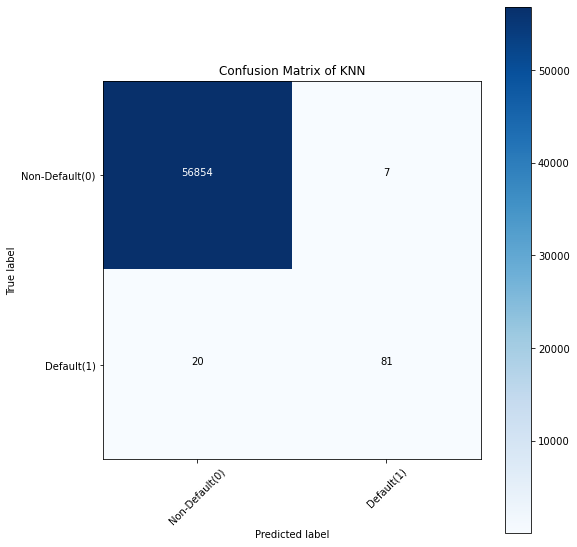

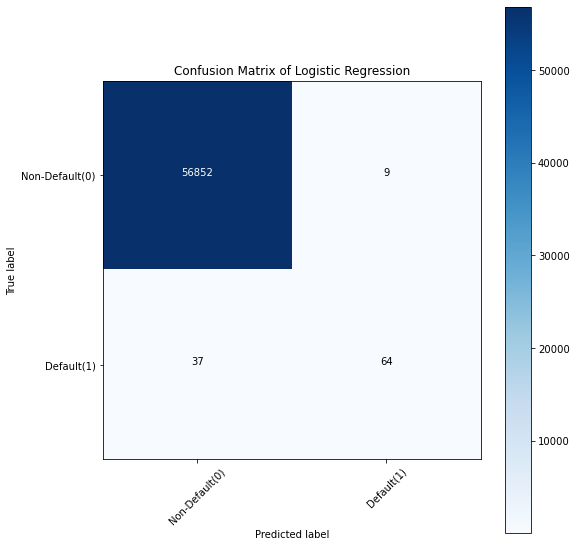

In [26]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.close(1);plt.figure(1)
plot_confusion_matrix(knn_matrix,classes = ['Non-Default(0)','Default(1)'], 
                            normalize = False, title = 'KNN')
plt.show()
    
plt.close(2);plt.figure(2)
plot_confusion_matrix(lr_matrix,classes = ['Non-Default(0)','Default(1)'], 
                            normalize = False, title = 'Logistic Regression')
plt.show()

From the confusion matrix of KNN and Lorgistic Regression, we see that they perfom almost identically when predicting non-fraudulant transactions.
However the preformence of both models differ a bit more when predicting fraudulant transactions. The knn correctly predicted 17 more fraudulant transactions than Logistic Regression. <br><br>
### In Conclusion
The 6 models that were compared all performed with at least 99% accuracy. The one that came on top however was the KNN model, and the least performing one was Logistic Regression. It is worth noting that no hyperparameter tuning was done. So it is entirely possible to find an even more accurate model with a little tuneing!!! 